# Proyecto Inteligencia Artificial


# Introducción
El presente proyecto esta basado en un dataset obtenido desde https://www.kaggle.com/spscientist/students-performance-in-exams

Students Performance in Exams
Este dataset esta relacionado al desempeño de los estudiantes en Estados Unidos de escuela secundaria, en las asignaturas de: 

    - matemáticas
    - escritura
    - lectura

consta con 1000 registros de datos y tiene 8 columnas con datos personales, academicos y desempeño; los cuales estan detallados a continuación:
    - genero .- el sexo del estudiante(male, female) (string)
    - raza/ednia .- grupo social al que pertenece el estudiante(grupo A,         grupo B, grupo C, grupo D)(string)
    - nivel de educacion de padres.- nivel de estudio     alcanzado(licenciatura, alguna educación superior, maestria, escuela secundaria )(string)
    - almuerzo .- alimetacion(standard, libre/reducido)(string)
    - test de preparacion .- si cumplio o no con el test de preparacion(none, completed)(string)
    - math score .- calificacion en matematicas(0-100)(int)
    - reading score .- calificacion en lectura(0-100)(int)
    - writing score .- calificacion en escritura(0-100)(int)

# Problema
Los estudiantes varones presentan una baja en sus notas, debido a la influencia de sus compañeras de clase 

# Objetivos
    

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# gender
# race/ethnicity 
# parental_level_of_education 
# lunch 
# test_preparation_course
# math_score
# reading_score
# writing_score 

data = pd.read_csv("StudentsPerformance.csv")
print(data.tail())

     gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  


# Preprocesamiento
    

    - Se reemplazan los valores que no son reconocidos por la media de las respectivas columnas
    - Se cambian los valores de tipo string a valores de tipo int en las columnas genero y test de preparacion 

In [2]:
#PREPROCESAMIENTO
#"math score","reading score","writing score"
promath = data['math score'].mean()
proreading = data['reading score'].mean()
prowriting = data['writing score'].mean()
data['math score'].replace(np.nan, promath)
data['reading score'].replace(np.nan, proreading)
data['writing score'].replace(np.nan, prowriting)

header = ['genero', 'raza', 'nivel de educacion padres', 'almuerzo', 'test de preparacion', 'nota matematicas', 'nota lectura', 'nota escritura']
data.columns = header

data = pd.get_dummies(data, columns = ['genero'], drop_first = True)
data = pd.get_dummies(data, columns = ['test de preparacion'], drop_first = True)

print(data)

        raza nivel de educacion padres      almuerzo  nota matematicas  \
0    group B         bachelor's degree      standard                72   
1    group C              some college      standard                69   
2    group B           master's degree      standard                90   
3    group A        associate's degree  free/reduced                47   
4    group C              some college      standard                76   
..       ...                       ...           ...               ...   
995  group E           master's degree      standard                88   
996  group C               high school  free/reduced                62   
997  group C               high school  free/reduced                59   
998  group D              some college      standard                68   
999  group D              some college  free/reduced                77   

     nota lectura  nota escritura  genero_male  test de preparacion_none  
0              72              74   

# variables de train y test
    * Se seleccionaron X variable independiente caracteristicas
    las notas de las tres asignaturas (matematicas, lectura y escritura)
    * Se seleccionó como variable dependiente a la columna genero 

In [3]:
df = pd.DataFrame(data)
datos = df.iloc[:,:].values
#print(datos)
x = datos[:,3:6]
y = df['genero_male']
#print(x)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("X_train")
print(X_train)
print("y_train")
print(y_train)


X_train
[[62 70 75]
 [66 83 83]
 [79 89 86]
 ...
 [53 62 53]
 [50 48 53]
 [85 91 89]]
y_train
29     0
535    0
695    0
557    1
836    1
      ..
106    0
270    1
860    0
435    1
102    0
Name: genero_male, Length: 800, dtype: uint8


In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.tree import export_graphviz

In [7]:
import graphviz

In [8]:
import matplotlib.pyplot as plt

In [9]:
arbol = DecisionTreeClassifier()

In [10]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
arbol.score(X_test, y_test)

0.82

In [24]:
arbol.score(X_train, y_train)

0.99375

In [25]:
targetnames = ['male','female']

In [26]:
featurenames = ['matematicas','lectura', 'escritura']

In [27]:
export_graphviz(arbol, out_file= 'arbol.dot',class_names=targetnames, feature_names=featurenames, impurity=False, filled=True)

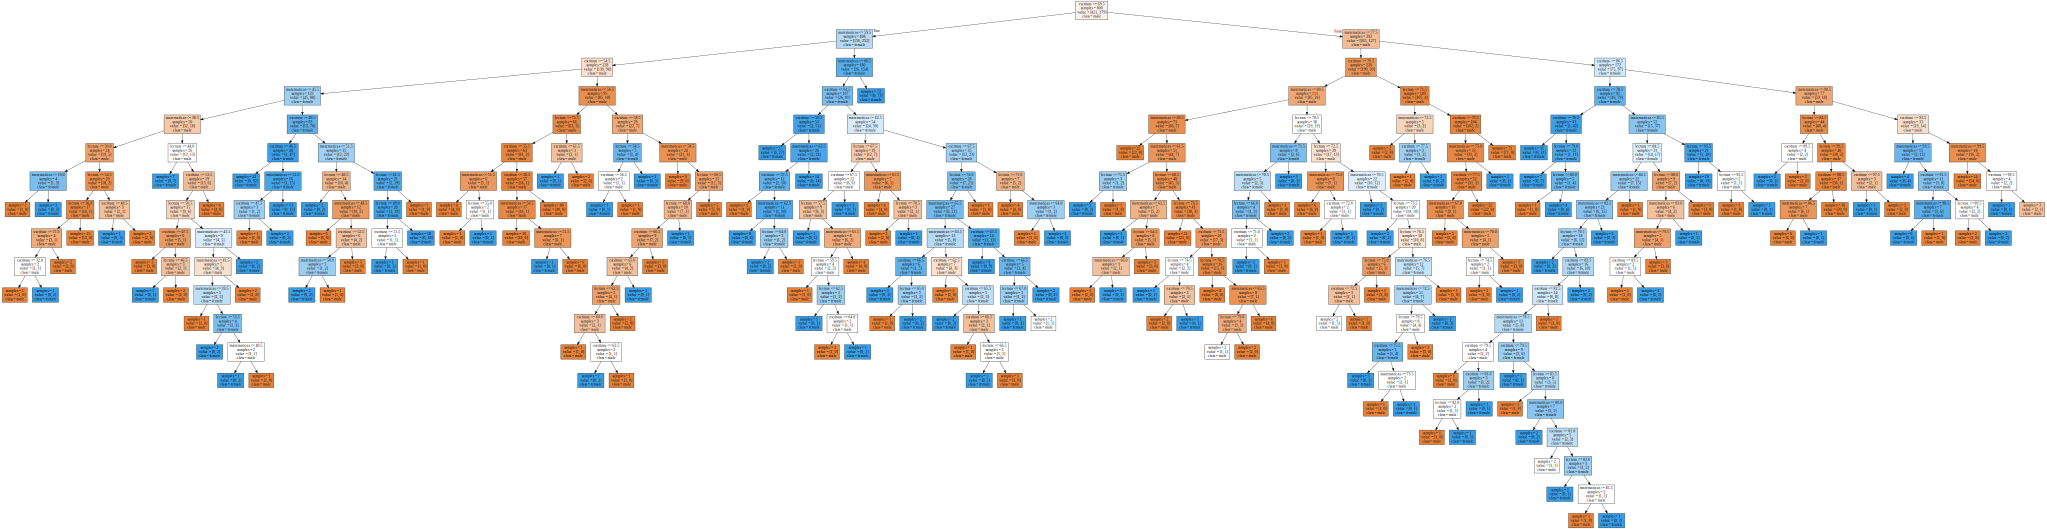

In [28]:
with open('arbol.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)    

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score 
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
iter_for_prediction = cv.split(x, y)
for index, (train_index, test_index) in enumerate(iter_for_prediction):
    print(index)
    randomf = RandomForestClassifier(random_state=0)
    gnb = GaussianNB()
    sk_clasificador = {'GaussianNB':gnb,
                       'RandomForest':randomf}
    for clasifier in sk_clasificador:
        estimador = sk_clasificador[clasifier]
        score = cross_val_score(estimador, x, y, scoring='accuracy', cv=[(train_index, test_index)])
        print(estimador, score)

0
GaussianNB(priors=None, var_smoothing=1e-09) [0.695]
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False) [0.84]
1
GaussianNB(priors=None, var_smoothing=1e-09) [0.715]
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samp

In [31]:
from sklearn.metrics import confusion_matrix

array([[91, 86, 84],
       [53, 66, 73],
       [80, 73, 72],
       [74, 77, 73],
       [84, 83, 78],
       [81, 75, 78],
       [69, 70, 63],
       [54, 61, 62],
       [87, 73, 72],
       [51, 54, 41],
       [45, 47, 49],
       [30, 26, 22],
       [67, 80, 81],
       [49, 65, 61],
       [85, 81, 85],
       [65, 78, 82],
       [53, 52, 42],
       [55, 46, 44],
       [48, 58, 54],
       [56, 65, 63],
       [79, 72, 69],
       [43, 51, 54],
       [45, 73, 70],
       [36, 53, 43],
       [80, 79, 79],
       [80, 75, 77],
       [68, 74, 74],
       [40, 59, 51],
       [34, 48, 41],
       [49, 58, 60],
       [62, 61, 57],
       [71, 61, 69],
       [62, 63, 56],
       [76, 71, 72],
       [84, 77, 71],
       [45, 53, 55],
       [77, 78, 73],
       [69, 77, 77],
       [73, 78, 74],
       [0, 17, 10],
       [82, 75, 77],
       [65, 66, 62],
       [67, 61, 68],
       [54, 63, 67],
       [90, 87, 75],
       [59, 63, 75],
       [74, 70, 69],
       [29, 29

# Conclusiones
Podemos decir que el modelo de arbol de decision es vastante factible con un 82% de exactitud y por parte de 